## Review and Evaluation of Map Generalization Techniques (CartoAI)
Project by <b><a href = 'ramavajjala@wisc.edu'>C S Siddharth Ramavajjala<a> <sup>1,a</sup></b>, <b><a href = 'sgnamburi@wisc.edu'>G N V V Satya Sai Srinath<a><sup>2,b</sup></b>, <b><a href = 'gangaraju2@wisc.edu'>Ramakrishna Raju Gangaraju<a><sup>3,a</sup></b>

<i>a - Department of Geography, University of Wisconsin - Madison*</i><br>
<i>b - Department of Computer Science, University of Wisconsin - Madison*</i>

<b>Questions for tomorrow</b>
1. Benchmark map (Moriarity or line project)
2. Visvalingam
3. RDP
4. Machine learning simplification (explore some noise reduction algorithm)

Questions: 
1. Is there any metric to know whether a map is undergeneralized/overgeneralized? How I can say which map is better when 2 maps are given

2. Any ML algorithms already used for map simplification

In [2]:
# importing libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import sys, os

In [3]:
#function to change current working directory
def change_os(path):                       
    print(os.getcwd())
    os.chdir(path)
    print(os.getcwd())

#change_os(r'C:\Users\Sidrcs\Documents\Github\map_generalisation_ml')
change_os(r"C:\Users\ramak\Documents\GitHub\map_generalisation_ml")

C:\Users\ramak\Documents\GitHub\map_generalisation_ml
C:\Users\ramak\Documents\GitHub\map_generalisation_ml


In [4]:
# import Florida shapefile
#fl_gdf = gpd.read_file(r'Data\Florida.shp')
fl_gdf = gpd.read_file(r"C:\Users\ramak\Documents\GitHub\map_generalisation_ml\Data\Florida.shp")

A:\Softwares\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


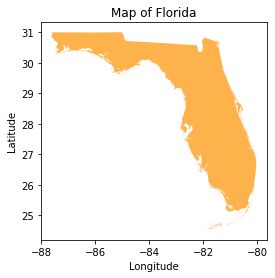

In [5]:
# static plot of Florida
ax = fl_gdf.plot(color = '#feb24c')

# adding title, longitude and latitude
plt.title('Map of Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show map
plt.show()

In [6]:
fl_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

A:\Softwares\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

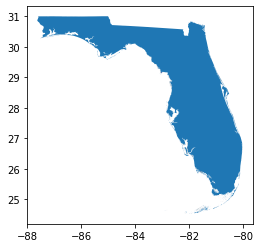

In [7]:
fl_gdf.set_crs('epsg:32617', allow_override=True)
fl_gdf.plot()

In [8]:
# interactive map of FLorida
fl_gdf.explore(tiles="CartoDB positron", # background tiles
               color = '#feb24c', # color of map
               tooltip = 'NAME', # attribute on hover
               popup = True) # show all attributes on click

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

In [9]:
# convert into geoseries
fl_gs = gpd.GeoSeries(fl_gdf.geometry[0])
type(fl_gs) # Read more - https://geopandas.org/en/stable/docs/reference/geoseries.html

geopandas.geoseries.GeoSeries

<h3> Detailed breakdown of code below </h3><br>
<b>For Srinath</b>: GeoDataFrame(gdf) has both data, geometry. Try printing of <code>fl_gdf.head(1)</code>, you could observe a column that stores geometry.

In [10]:
fl_gs

0    MULTIPOLYGON (((-82.88482 24.62121, -82.88619 ...
dtype: geometry

Furthermore, Florida is a <b>multipolygon</b> feature: <code>fl_gs</code> (geoseries), i.e., it is a single feature that contains multiple polygons (Think of India with Andaman & Nicobar islands and Lakshadweep, even <b>India</b> is a multi-polygon). 

Geometry for each polygon is extracted using <code>.geoms</code> property.

Therefore, we are extracting <b>geometry</b> from the gdf using <code> fl_gdf.geometry[0] or fl_gdf.geometry.iloc[0] </code>

In [11]:
# get the geometry of the first feature (i.e., the MultiPolygon for Florida)
fl_multipolygon = fl_gdf.geometry[0]

# initialize a counter for the total number of vertices, feature count
num_vertices_total = 0
feature_count = 0

# iterate over each individual polygon in the MultiPolygon
for fl_polygon in fl_multipolygon.geoms:
    
    # get the number of vertices in the polygon
    num_vertices = len(fl_polygon.exterior.coords)
    
    # add the number of vertices for this polygon to the total
    num_vertices_total += num_vertices
    feature_count += 1

# print the total number of vertices
print(f'Total number of vertices for Florida MultiPolygon: {num_vertices_total}')
# print number of polygons in the Multi polygon feature
print(f'Number of polygons: {feature_count}')

Total number of vertices for Florida MultiPolygon: 1087787
Number of polygons: 4225


<h4>Links to download Line Simplification Algorithms</h4>
URL to download the Ramer-Douglas-Peucker algorithm(RDP) - <a href = 'https://pypi.org/project/rdp/'>click here for RDP</a><br>
URL to download the Visvalingam-Wyatt algorithm(VW) - <a href = 'https://pypi.org/project/visvalingamwyatt/'>click here for VW</a>

In [12]:
# install line simplification algorithms
!pip install rdp
!pip install visvalingamwyatt

In [13]:
import json

# convert GeoDataFrame to JSON 
fl_json = fl_gdf.to_json()

#writing JSON file into Data folder as Florida.json
try:
    #creating json file to store the output of fl_json
    path = r"C:\Users\ramak\Documents\GitHub\map_generalisation_ml\Raju_Folder\Florida.json"
    
    if os.path.exists(path):
        #Removes file if already exists in the path
        os.remove(path)
        #writing JSON data into Florida.json file
        with open(path,'w') as json_file:
            json_file.write(fl_json)
            print(f'JSON file is created in {os.getcwd()}')
         
        with open(r"C:\Users\ramak\Documents\GitHub\map_generalisation_ml\Raju_Folder\Florida.json",'r') as json_file:
             #converts JSON (string) to dictionary format
            fl_json = json.load(json_file)
        #it should yield dictionary
        print(type(fl_json))
        
    else:
        with open(path,'w') as json_file:
            json_file.write(fl_json)
            print(f'JSON file is created in {os.getcwd()}')
        with open(r"C:\Users\ramak\Documents\GitHub\map_generalisation_ml\Raju_Folder\Florida.json",'r') as json_file:
             #converts JSON (string) to dictionary format
            fl_json = json.load(json_file)
        print(type(fl_json))
        
except Exception as e:
    print(f'File creation and conversion of {path} has created the error: {e}')

JSON file is created in C:\Users\ramak\Documents\GitHub\map_generalisation_ml
<class 'dict'>


<b>For Srinath :</b> JSON format is different for a shapefile and how it stores geometry.
For instance, try to output <code>fl_json</code>, it contains two major keys <code>type</code>, <code>features</code>. Try <code>fl_json.keys()</code>. Now, use <code>fl_json['features']</code> and try <code>type(fl_json['features'])</code>, it returns a <code>list</code>. Now, use <code>fl_json['features'][0]</code>, and check type, and it is of type <code>dict</code>. Now, again check for keys. <code>fl_json_dict = fl_json['features][0]</code> and it generates <code>['id', 'type', 'properties', 'geometry']</code>. Therefore, we should pull geometry now, <code>fl_json['features'][0]['geometry']</code>

Try <code>fl_json</code> to understand the above structure as suggested.              

In [14]:
feature = fl_json['features'][0]

In [15]:
feature['geometry']

{'type': 'MultiPolygon',
 'coordinates': [[[[-82.88481800015057, 24.621207999949263],
    [-82.88619399975323, 24.620150999768896],
    [-82.88722300044105, 24.620801000066137],
    [-82.88719600009529, 24.622215999668697],
    [-82.88665700131952, 24.623716999639896],
    [-82.88618900042201, 24.624375000306088],
    [-82.88487999941242, 24.624414000305933],
    [-82.88334299957972, 24.62442099972941],
    [-82.88337900034054, 24.624109999776692],
    [-82.88388500029248, 24.623264000333393],
    [-82.88481800015057, 24.621207999949263]]],
  [[[-82.86293800018854, 24.62543000039426],
    [-82.86391800041537, 24.624434000328904],
    [-82.86409300039162, 24.624572000397563],
    [-82.86414400004554, 24.624732999728224],
    [-82.86369099983972, 24.62543000039426],
    [-82.86356300023226, 24.625780000346765],
    [-82.86353799997869, 24.62640899967562],
    [-82.86333699970271, 24.626431999836996],
    [-82.86311200011869, 24.626317999975754],
    [-82.8628859995892, 24.625699000208726

In [16]:
import visvalingamwyatt as vw
from rdp import rdp
import time 

start = time.time()
ratio = 0.90

fl_simplified = vw.simplify_geometry(feature['geometry'], ratio = ratio)

end = time.time()

print(f'Total time in milliseconds: {float(end-start)} sec')

Total time in milliseconds: 3787.264374732971 sec


In [22]:
from shapely.geometry import MultiPolygon, Polygon
from itertools import chain

In [23]:
# create a list of shapely Polygon objects, 
#first need to flatten the list of coordinates into a single list of (x, y) pairs for each polygon, therfore coordinate pairs will avoid nested list of list
polygons = [Polygon(list(chain.from_iterable(coords))) for coords in fl_simplified['coordinates']]

# create a GeoDataFrame with the polygons and set to WGS84
gdf = gpd.GeoDataFrame({'geometry': polygons})
gdf.crs = 'EPSG:4326'

# save the GeoDataFrame as a shapefile
gdf.to_file('Raju_Folder/Simplified_florida/fl_simplified.shp', driver='ESRI Shapefile')

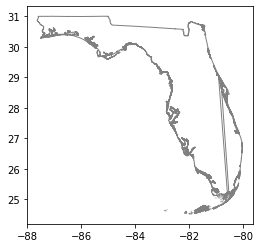

In [30]:
fl_sim_shp = gpd.read_file("Raju_Folder/Simplified_florida/fl_simplified.shp")
ax = fl_sim_shp.plot(edgecolor = 'grey', color = 'white')
plt.show()

In [82]:
type(fl_simplified)

dict

In [111]:
ratio = 0.90

In [113]:
number_of_polygons = len(fl_simplified['coordinates'])

vertices_retained = 0
for i in range(number_of_polygons):
    vertices_retained += len(fl_simplified['coordinates'][i][0])
    
print(f"Number of polygons = {number_of_polygons}")
print(f"Number of vertices = {vertices_retained}")

Number of polygons = 4225
Number of vertices = 977118


In [114]:
print(f'Total of number of vertices removed using {ratio} are: {num_vertices_total - vertices_retained} and percentage removed are: {round(((num_vertices_total - vertices_retained)/num_vertices_total)*100}')

Total of number of vertices removed using 0.9 are: 110669 and percentage removed are: 10.17377482907959


### RDP Algorithm

In [34]:
from rdp import rdp
import numpy as np
rdp_array = np.array(feature['geometry']['coordinates'][0], dtype = 'object')
rdp_out = rdp(rdp_array, epsilon = 0.9)
print(len(rdp_out[0]))

11


### Reumann Witkam Algorithm

### Radial distance Algorithm

In [20]:
!pip install topojson==1.0rc6

  Attempting uninstall: topojson
    Found existing installation: topojson 1.5
    Uninstalling topojson-1.5:
      Successfully uninstalled topojson-1.5


### TopoJSON simplify method
Read more of <code>topojson</code> and simplify <a href = 'https://martinfleischmann.net/line-simplification-algorithms/'> Martin Fleishcmann Blog </a>. Tutorial on how to use <a href = 'https://mattijn.github.io/topojson/example/input-types.html'> TopoJSON </a>

In [34]:
import topojson
import json

file = r'Data\Florida_topo.json'
with open(file, 'r') as fl_topo:
    data = json.load(fl_topo)

topo = topojson.Topology(data, object_name="data")
topo.toposimplify(20).to_gdf()

MemoryError: Unable to allocate 7.38 GiB for an array with shape (4245, 116623, 2) and data type float64